In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [83]:
import seaborn as sns

In [84]:
data = pd.read_csv('data_stop.xls')

In [85]:
data.drop('Unnamed: 0',axis =1,inplace = True)

In [86]:
data.head()

,Product_Weight,Product_Shelf_Visibility,Product_Price,Supermarket_Opening_Year,Product_Supermarket_Sales,Low Fat,Normal Fat,Ultra Low fat,Cluster 1,Cluster 2,Cluster 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,11.6,0.068535,357.54,2005,709.08,1,0,0,0,0,1,1,0,0,0
1,11.6,0.040912,355.79,1994,6381.69,1,0,0,0,0,1,0,1,0,0
2,11.6,0.041178,350.79,2014,6381.69,1,0,0,0,1,0,0,1,0,0
3,11.6,0.041113,355.04,2016,2127.23,1,0,0,0,0,1,0,0,1,0
4,11.6,0.000000,354.79,2011,2481.77,0,0,1,0,1,0,0,1,0,0


In [87]:
data.columns

Index(['Product_Weight', 'Product_Shelf_Visibility', 'Product_Price',
       'Supermarket_Opening_Year', 'Product_Supermarket_Sales', 'Low Fat',
       'Normal Fat', 'Ultra Low fat', 'Cluster 1', 'Cluster 2', 'Cluster 3',
       'Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'],
      dtype='object')

In [88]:
X = data[['Product_Weight', 'Product_Shelf_Visibility', 'Product_Price','Supermarket_Opening_Year',  'Low Fat','Normal Fat', 'Ultra Low fat', 'Cluster 1', 'Cluster 2', 'Cluster 3','Grocery Store', 'Supermarket Type1', 'Supermarket Type2','Supermarket Type3']]
y = data['Product_Supermarket_Sales']

In [89]:
from sklearn.cross_validation import train_test_split


In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=50)

In [91]:
from sklearn.linear_model import LinearRegression

In [92]:
mod = LinearRegression()

In [93]:
mod.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [94]:
pred = mod.predict(X_test)

In [95]:
from sklearn.cross_validation import cross_val_score
score = cross_val_score(mod,X_test,y_test,cv =10)

In [96]:
print(score.mean()*100)

57.64633959272227


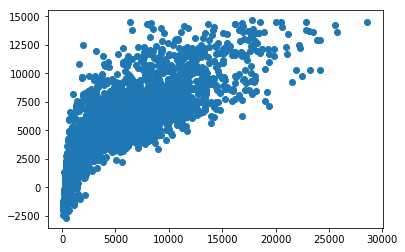

In [97]:
plt.scatter(y_test,pred)

In [98]:
from sklearn.neighbors import KNeighborsRegressor

In [99]:
knn = KNeighborsRegressor()

In [100]:
knn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [101]:
predd = knn.predict(X_test)

In [102]:
from sklearn.cross_validation import cross_val_score
score = cross_val_score(knn,X_test,y_test,cv =10)

In [103]:
print(score.mean()*100)

27.62079982075448


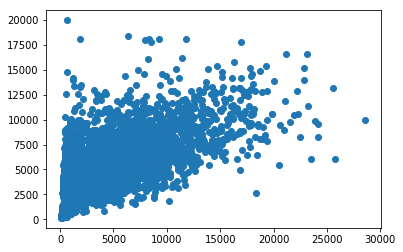

In [104]:
plt.scatter(y_test,predd)

In [105]:
from sklearn.grid_search import GridSearchCV

In [106]:
param_grid = {'n_neighbors':[5,1,10,15,20,30,40,50,60,70,1000],'p' : [1,2,4,6,7,8]}

In [107]:
grid = GridSearchCV( KNeighborsRegressor() , param_grid , verbose =  3  )

In [108]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 66 candidates, totalling 198 fits
[CV] n_neighbors=5, p=1 ..............................................
[CV] ..................... n_neighbors=5, p=1, score=0.409267 -   0.0s
[CV] n_neighbors=5, p=1 ..............................................
[CV] ..................... n_neighbors=5, p=1, score=0.365416 -   0.0s
[CV] n_neighbors=5, p=1 ..............................................
[CV] ..................... n_neighbors=5, p=1, score=0.322528 -   0.0s
[CV] n_neighbors=5, p=2 ..............................................
[CV] ..................... n_neighbors=5, p=2, score=0.235158 -   0.0s
[CV] n_neighbors=5, p=2 ..............................................
[CV] ..................... n_neighbors=5, p=2, score=0.235893 -   0.0s
[CV] n_neighbors=5, p=2 ..............................................
[CV] ..................... n_neighbors=5, p=2, score=0.152880 -   0.0s
[CV] n_neighbors=5, p=4 ..............................................
[CV] ..........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ..................... n_neighbors=5, p=4, score=0.077234 -   0.0s
[CV] n_neighbors=5, p=6 ..............................................
[CV] ..................... n_neighbors=5, p=6, score=0.190747 -   0.0s
[CV] n_neighbors=5, p=6 ..............................................
[CV] ..................... n_neighbors=5, p=6, score=0.169223 -   0.0s
[CV] n_neighbors=5, p=6 ..............................................
[CV] ..................... n_neighbors=5, p=6, score=0.068334 -   0.0s
[CV] n_neighbors=5, p=7 ..............................................
[CV] ..................... n_neighbors=5, p=7, score=0.190578 -   0.0s
[CV] n_neighbors=5, p=7 ..............................................
[CV] ..................... n_neighbors=5, p=7, score=0.168213 -   0.0s
[CV] n_neighbors=5, p=7 ..............................................
[CV] ..................... n_neighbors=5, p=7, score=0.066795 -   0.0s
[CV] n_neighbors=5, p=8 ..............................................
[CV] .

[CV] .................... n_neighbors=15, p=7, score=0.239545 -   0.0s
[CV] n_neighbors=15, p=7 .............................................
[CV] .................... n_neighbors=15, p=7, score=0.157266 -   0.0s
[CV] n_neighbors=15, p=8 .............................................
[CV] .................... n_neighbors=15, p=8, score=0.273276 -   0.0s
[CV] n_neighbors=15, p=8 .............................................
[CV] .................... n_neighbors=15, p=8, score=0.240242 -   0.0s
[CV] n_neighbors=15, p=8 .............................................
[CV] .................... n_neighbors=15, p=8, score=0.156911 -   0.0s
[CV] n_neighbors=20, p=1 .............................................
[CV] .................... n_neighbors=20, p=1, score=0.351393 -   0.0s
[CV] n_neighbors=20, p=1 .............................................
[CV] .................... n_neighbors=20, p=1, score=0.337262 -   0.0s
[CV] n_neighbors=20, p=1 .............................................
[CV] .

[CV] n_neighbors=50, p=2 .............................................
[CV] .................... n_neighbors=50, p=2, score=0.203041 -   0.0s
[CV] n_neighbors=50, p=4 .............................................
[CV] .................... n_neighbors=50, p=4, score=0.290793 -   0.0s
[CV] n_neighbors=50, p=4 .............................................
[CV] .................... n_neighbors=50, p=4, score=0.275559 -   0.0s
[CV] n_neighbors=50, p=4 .............................................
[CV] .................... n_neighbors=50, p=4, score=0.200943 -   0.0s
[CV] n_neighbors=50, p=6 .............................................
[CV] .................... n_neighbors=50, p=6, score=0.288229 -   0.0s
[CV] n_neighbors=50, p=6 .............................................
[CV] .................... n_neighbors=50, p=6, score=0.272187 -   0.0s
[CV] n_neighbors=50, p=6 .............................................
[CV] .................... n_neighbors=50, p=6, score=0.200414 -   0.0s
[CV] n

[CV] .................. n_neighbors=1000, p=6, score=0.183718 -   1.0s
[CV] n_neighbors=1000, p=6 ...........................................
[CV] .................. n_neighbors=1000, p=6, score=0.174477 -   0.7s
[CV] n_neighbors=1000, p=6 ...........................................
[CV] .................. n_neighbors=1000, p=6, score=0.158804 -   0.8s
[CV] n_neighbors=1000, p=7 ...........................................
[CV] .................. n_neighbors=1000, p=7, score=0.183718 -   0.6s
[CV] n_neighbors=1000, p=7 ...........................................
[CV] .................. n_neighbors=1000, p=7, score=0.174477 -   0.8s
[CV] n_neighbors=1000, p=7 ...........................................
[CV] .................. n_neighbors=1000, p=7, score=0.158804 -   0.7s
[CV] n_neighbors=1000, p=8 ...........................................
[CV] .................. n_neighbors=1000, p=8, score=0.183718 -   0.7s
[CV] n_neighbors=1000, p=8 ...........................................
[CV] .

[Parallel(n_jobs=1)]: Done 198 out of 198 | elapsed:   21.9s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [5, 1, 10, 15, 20, 30, 40, 50, 60, 70, 1000], 'p': [1, 2, 4, 6, 7, 8]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=3)

In [109]:
grid.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=1,
          weights='uniform')

In [110]:
grid_prediction = grid.predict(X_test)

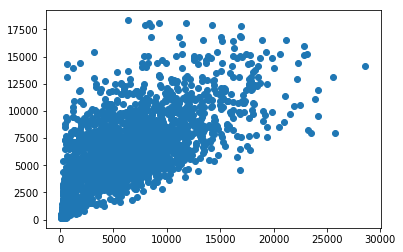

In [111]:
plt.scatter(y_test,grid_prediction)

In [112]:
from sklearn.cross_validation import cross_val_score
score = cross_val_score(grid,X_test,y_test,cv =10)

Fitting 3 folds for each of 66 candidates, totalling 198 fits
[CV] n_neighbors=5, p=1 ..............................................
[CV] ..................... n_neighbors=5, p=1, score=0.433422 -   0.0s
[CV] n_neighbors=5, p=1 ..............................................
[CV] ..................... n_neighbors=5, p=1, score=0.380121 -   0.0s
[CV] n_neighbors=5, p=1 ..............................................
[CV] ..................... n_neighbors=5, p=1, score=0.443351 -   0.0s
[CV] n_neighbors=5, p=2 ..............................................
[CV] ..................... n_neighbors=5, p=2, score=0.266221 -   0.0s
[CV] n_neighbors=5, p=2 ..............................................
[CV] ..................... n_neighbors=5, p=2, score=0.206519 -   0.0s
[CV] n_neighbors=5, p=2 ..............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ..................... n_neighbors=5, p=2, score=0.272921 -   0.0s
[CV] n_neighbors=5, p=4 ..............................................
[CV] ..................... n_neighbors=5, p=4, score=0.240523 -   0.0s
[CV] n_neighbors=5, p=4 ..............................................
[CV] ..................... n_neighbors=5, p=4, score=0.149231 -   0.0s
[CV] n_neighbors=5, p=4 ..............................................
[CV] ..................... n_neighbors=5, p=4, score=0.252000 -   0.0s
[CV] n_neighbors=5, p=6 ..............................................
[CV] ..................... n_neighbors=5, p=6, score=0.233594 -   0.0s
[CV] n_neighbors=5, p=6 ..............................................
[CV] ..................... n_neighbors=5, p=6, score=0.151865 -   0.0s
[CV] n_neighbors=5, p=6 ..............................................
[CV] ..................... n_neighbors=5, p=6, score=0.242664 -   0.0s
[CV] n_neighbors=5, p=7 ..............................................
[CV] .

[CV] .................... n_neighbors=15, p=7, score=0.280142 -   0.0s
[CV] n_neighbors=15, p=7 .............................................
[CV] .................... n_neighbors=15, p=7, score=0.178248 -   0.0s
[CV] n_neighbors=15, p=7 .............................................
[CV] .................... n_neighbors=15, p=7, score=0.265638 -   0.0s
[CV] n_neighbors=15, p=8 .............................................
[CV] .................... n_neighbors=15, p=8, score=0.281186 -   0.0s
[CV] n_neighbors=15, p=8 .............................................
[CV] .................... n_neighbors=15, p=8, score=0.178177 -   0.0s
[CV] n_neighbors=15, p=8 .............................................
[CV] .................... n_neighbors=15, p=8, score=0.266014 -   0.0s
[CV] n_neighbors=20, p=1 .............................................
[CV] .................... n_neighbors=20, p=1, score=0.379315 -   0.0s
[CV] n_neighbors=20, p=1 .............................................
[CV] .

[CV] .................... n_neighbors=50, p=2, score=0.308514 -   0.0s
[CV] n_neighbors=50, p=2 .............................................
[CV] .................... n_neighbors=50, p=2, score=0.238980 -   0.0s
[CV] n_neighbors=50, p=2 .............................................
[CV] .................... n_neighbors=50, p=2, score=0.275128 -   0.0s
[CV] n_neighbors=50, p=4 .............................................
[CV] .................... n_neighbors=50, p=4, score=0.305737 -   0.1s
[CV] n_neighbors=50, p=4 .............................................
[CV] .................... n_neighbors=50, p=4, score=0.226543 -   0.0s
[CV] n_neighbors=50, p=4 .............................................
[CV] .................... n_neighbors=50, p=4, score=0.270828 -   0.0s
[CV] n_neighbors=50, p=6 .............................................
[CV] .................... n_neighbors=50, p=6, score=0.306156 -   0.0s
[CV] n_neighbors=50, p=6 .............................................
[CV] .

[CV] .................. n_neighbors=1000, p=4, score=0.170906 -   0.4s
[CV] n_neighbors=1000, p=4 ...........................................
[CV] .................. n_neighbors=1000, p=4, score=0.167241 -   0.4s
[CV] n_neighbors=1000, p=6 ...........................................
[CV] .................. n_neighbors=1000, p=6, score=0.182466 -   0.5s
[CV] n_neighbors=1000, p=6 ...........................................
[CV] .................. n_neighbors=1000, p=6, score=0.170912 -   0.4s
[CV] n_neighbors=1000, p=6 ...........................................
[CV] .................. n_neighbors=1000, p=6, score=0.167230 -   0.4s
[CV] n_neighbors=1000, p=7 ...........................................
[CV] .................. n_neighbors=1000, p=7, score=0.182466 -   0.4s
[CV] n_neighbors=1000, p=7 ...........................................
[CV] .................. n_neighbors=1000, p=7, score=0.170912 -   0.5s
[CV] n_neighbors=1000, p=7 ...........................................
[CV] .

[Parallel(n_jobs=1)]: Done 198 out of 198 | elapsed:   16.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ..................... n_neighbors=5, p=6, score=0.152288 -   0.0s
[CV] n_neighbors=5, p=6 ..............................................
[CV] ..................... n_neighbors=5, p=6, score=0.187743 -   0.0s
[CV] n_neighbors=5, p=7 ..............................................
[CV] ..................... n_neighbors=5, p=7, score=0.176095 -   0.0s
[CV] n_neighbors=5, p=7 ..............................................
[CV] ..................... n_neighbors=5, p=7, score=0.151346 -   0.0s
[CV] n_neighbors=5, p=7 ..............................................
[CV] ..................... n_neighbors=5, p=7, score=0.187863 -   0.0s
[CV] n_neighbors=5, p=8 ..............................................
[CV] ..................... n_neighbors=5, p=8, score=0.175666 -   0.0s
[CV] n_neighbors=5, p=8 ..............................................
[CV] ..................... n_neighbors=5, p=8, score=0.152612 -   0.0s
[CV] n_neighbors=5, p=8 ..............................................
[CV] .

[CV] .................... n_neighbors=15, p=8, score=0.156424 -   0.0s
[CV] n_neighbors=15, p=8 .............................................
[CV] .................... n_neighbors=15, p=8, score=0.255291 -   0.0s
[CV] n_neighbors=20, p=1 .............................................
[CV] .................... n_neighbors=20, p=1, score=0.343201 -   0.0s
[CV] n_neighbors=20, p=1 .............................................
[CV] .................... n_neighbors=20, p=1, score=0.276448 -   0.0s
[CV] n_neighbors=20, p=1 .............................................
[CV] .................... n_neighbors=20, p=1, score=0.346181 -   0.0s
[CV] n_neighbors=20, p=2 .............................................
[CV] .................... n_neighbors=20, p=2, score=0.258129 -   0.0s
[CV] n_neighbors=20, p=2 .............................................
[CV] .................... n_neighbors=20, p=2, score=0.159109 -   0.0s
[CV] n_neighbors=20, p=2 .............................................
[CV] .

[CV] .................... n_neighbors=50, p=2, score=0.276327 -   0.0s
[CV] n_neighbors=50, p=2 .............................................
[CV] .................... n_neighbors=50, p=2, score=0.229447 -   0.0s
[CV] n_neighbors=50, p=2 .............................................
[CV] .................... n_neighbors=50, p=2, score=0.271269 -   0.0s
[CV] n_neighbors=50, p=4 .............................................
[CV] .................... n_neighbors=50, p=4, score=0.274308 -   0.0s
[CV] n_neighbors=50, p=4 .............................................
[CV] .................... n_neighbors=50, p=4, score=0.216878 -   0.0s
[CV] n_neighbors=50, p=4 .............................................
[CV] .................... n_neighbors=50, p=4, score=0.262205 -   0.0s
[CV] n_neighbors=50, p=6 .............................................
[CV] .................... n_neighbors=50, p=6, score=0.274030 -   0.0s
[CV] n_neighbors=50, p=6 .............................................
[CV] .

[CV] .................. n_neighbors=1000, p=4, score=0.167864 -   0.4s
[CV] n_neighbors=1000, p=4 ...........................................
[CV] .................. n_neighbors=1000, p=4, score=0.163988 -   0.4s
[CV] n_neighbors=1000, p=6 ...........................................
[CV] .................. n_neighbors=1000, p=6, score=0.176285 -   0.4s
[CV] n_neighbors=1000, p=6 ...........................................
[CV] .................. n_neighbors=1000, p=6, score=0.167850 -   0.4s
[CV] n_neighbors=1000, p=6 ...........................................
[CV] .................. n_neighbors=1000, p=6, score=0.164001 -   0.5s
[CV] n_neighbors=1000, p=7 ...........................................
[CV] .................. n_neighbors=1000, p=7, score=0.176285 -   0.4s
[CV] n_neighbors=1000, p=7 ...........................................
[CV] .................. n_neighbors=1000, p=7, score=0.167850 -   0.6s
[CV] n_neighbors=1000, p=7 ...........................................
[CV] .

[Parallel(n_jobs=1)]: Done 198 out of 198 | elapsed:   13.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ..................... n_neighbors=5, p=6, score=0.223202 -   0.0s
[CV] n_neighbors=5, p=6 ..............................................
[CV] ..................... n_neighbors=5, p=6, score=0.181490 -   0.0s
[CV] n_neighbors=5, p=6 ..............................................
[CV] ..................... n_neighbors=5, p=6, score=0.219573 -   0.0s
[CV] n_neighbors=5, p=7 ..............................................
[CV] ..................... n_neighbors=5, p=7, score=0.226162 -   0.0s
[CV] n_neighbors=5, p=7 ..............................................
[CV] ..................... n_neighbors=5, p=7, score=0.183436 -   0.0s
[CV] n_neighbors=5, p=7 ..............................................
[CV] ..................... n_neighbors=5, p=7, score=0.220585 -   0.0s
[CV] n_neighbors=5, p=8 ..............................................
[CV] ..................... n_neighbors=5, p=8, score=0.226527 -   0.0s
[CV] n_neighbors=5, p=8 ..............................................
[CV] .

[CV] n_neighbors=20, p=1 .............................................
[CV] .................... n_neighbors=20, p=1, score=0.288016 -   0.0s
[CV] n_neighbors=20, p=1 .............................................
[CV] .................... n_neighbors=20, p=1, score=0.344802 -   0.0s
[CV] n_neighbors=20, p=2 .............................................
[CV] .................... n_neighbors=20, p=2, score=0.281623 -   0.0s
[CV] n_neighbors=20, p=2 .............................................
[CV] .................... n_neighbors=20, p=2, score=0.187550 -   0.0s
[CV] n_neighbors=20, p=2 .............................................
[CV] .................... n_neighbors=20, p=2, score=0.262005 -   0.0s
[CV] n_neighbors=20, p=4 .............................................
[CV] .................... n_neighbors=20, p=4, score=0.269890 -   0.0s
[CV] n_neighbors=20, p=4 .............................................
[CV] .................... n_neighbors=20, p=4, score=0.181835 -   0.0s
[CV] n

[CV] .................... n_neighbors=50, p=4, score=0.285498 -   0.0s
[CV] n_neighbors=50, p=4 .............................................
[CV] .................... n_neighbors=50, p=4, score=0.221262 -   0.0s
[CV] n_neighbors=50, p=4 .............................................
[CV] .................... n_neighbors=50, p=4, score=0.257389 -   0.0s
[CV] n_neighbors=50, p=6 .............................................
[CV] .................... n_neighbors=50, p=6, score=0.284879 -   0.0s
[CV] n_neighbors=50, p=6 .............................................
[CV] .................... n_neighbors=50, p=6, score=0.216787 -   0.0s
[CV] n_neighbors=50, p=6 .............................................
[CV] .................... n_neighbors=50, p=6, score=0.256038 -   0.0s
[CV] n_neighbors=50, p=7 .............................................
[CV] .................... n_neighbors=50, p=7, score=0.285550 -   0.0s
[CV] n_neighbors=50, p=7 .............................................
[CV] .

[CV] .................. n_neighbors=1000, p=6, score=0.169303 -   0.4s
[CV] n_neighbors=1000, p=6 ...........................................
[CV] .................. n_neighbors=1000, p=6, score=0.167780 -   0.4s
[CV] n_neighbors=1000, p=7 ...........................................
[CV] .................. n_neighbors=1000, p=7, score=0.173914 -   0.4s
[CV] n_neighbors=1000, p=7 ...........................................
[CV] .................. n_neighbors=1000, p=7, score=0.169303 -   0.4s
[CV] n_neighbors=1000, p=7 ...........................................
[CV] .................. n_neighbors=1000, p=7, score=0.167780 -   0.4s
[CV] n_neighbors=1000, p=8 ...........................................
[CV] .................. n_neighbors=1000, p=8, score=0.173914 -   0.4s
[CV] n_neighbors=1000, p=8 ...........................................
[CV] .................. n_neighbors=1000, p=8, score=0.169303 -   0.4s
[CV] n_neighbors=1000, p=8 ...........................................
[CV] .

[Parallel(n_jobs=1)]: Done 198 out of 198 | elapsed:   12.7s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ..................... n_neighbors=5, p=6, score=0.177334 -   0.0s
[CV] n_neighbors=5, p=6 ..............................................
[CV] ..................... n_neighbors=5, p=6, score=0.199217 -   0.0s
[CV] n_neighbors=5, p=7 ..............................................
[CV] ..................... n_neighbors=5, p=7, score=0.274303 -   0.0s
[CV] n_neighbors=5, p=7 ..............................................
[CV] ..................... n_neighbors=5, p=7, score=0.168900 -   0.0s
[CV] n_neighbors=5, p=7 ..............................................
[CV] ..................... n_neighbors=5, p=7, score=0.202498 -   0.0s
[CV] n_neighbors=5, p=8 ..............................................
[CV] ..................... n_neighbors=5, p=8, score=0.274296 -   0.0s
[CV] n_neighbors=5, p=8 ..............................................
[CV] ..................... n_neighbors=5, p=8, score=0.170040 -   0.0s
[CV] n_neighbors=5, p=8 ..............................................
[CV] .

[CV] .................... n_neighbors=20, p=2, score=0.208320 -   0.0s
[CV] n_neighbors=20, p=2 .............................................
[CV] .................... n_neighbors=20, p=2, score=0.270513 -   0.0s
[CV] n_neighbors=20, p=4 .............................................
[CV] .................... n_neighbors=20, p=4, score=0.316546 -   0.0s
[CV] n_neighbors=20, p=4 .............................................
[CV] .................... n_neighbors=20, p=4, score=0.204021 -   0.0s
[CV] n_neighbors=20, p=4 .............................................
[CV] .................... n_neighbors=20, p=4, score=0.259184 -   0.0s
[CV] n_neighbors=20, p=6 .............................................
[CV] .................... n_neighbors=20, p=6, score=0.316177 -   0.0s
[CV] n_neighbors=20, p=6 .............................................
[CV] .................... n_neighbors=20, p=6, score=0.204128 -   0.0s
[CV] n_neighbors=20, p=6 .............................................
[CV] .

[CV] .................... n_neighbors=50, p=4, score=0.264885 -   0.0s
[CV] n_neighbors=50, p=6 .............................................
[CV] .................... n_neighbors=50, p=6, score=0.312740 -   0.0s
[CV] n_neighbors=50, p=6 .............................................
[CV] .................... n_neighbors=50, p=6, score=0.226592 -   0.0s
[CV] n_neighbors=50, p=6 .............................................
[CV] .................... n_neighbors=50, p=6, score=0.265374 -   0.0s
[CV] n_neighbors=50, p=7 .............................................
[CV] .................... n_neighbors=50, p=7, score=0.312474 -   0.0s
[CV] n_neighbors=50, p=7 .............................................
[CV] .................... n_neighbors=50, p=7, score=0.226052 -   0.0s
[CV] n_neighbors=50, p=7 .............................................
[CV] .................... n_neighbors=50, p=7, score=0.264457 -   0.0s
[CV] n_neighbors=50, p=8 .............................................
[CV] .

[CV] .................. n_neighbors=1000, p=7, score=0.185656 -   0.4s
[CV] n_neighbors=1000, p=7 ...........................................
[CV] .................. n_neighbors=1000, p=7, score=0.171158 -   0.4s
[CV] n_neighbors=1000, p=7 ...........................................
[CV] .................. n_neighbors=1000, p=7, score=0.169749 -   0.4s
[CV] n_neighbors=1000, p=8 ...........................................
[CV] .................. n_neighbors=1000, p=8, score=0.185655 -   0.4s
[CV] n_neighbors=1000, p=8 ...........................................
[CV] .................. n_neighbors=1000, p=8, score=0.171152 -   0.4s
[CV] n_neighbors=1000, p=8 ...........................................
[CV] .................. n_neighbors=1000, p=8, score=0.169749 -   0.4s
Fitting 3 folds for each of 66 candidates, totalling 198 fits
[CV] n_neighbors=5, p=1 ..............................................
[CV] ..................... n_neighbors=5, p=1, score=0.429084 -   0.0s
[CV] n_neighbor

[Parallel(n_jobs=1)]: Done 198 out of 198 | elapsed:   12.9s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ..................... n_neighbors=5, p=6, score=0.241424 -   0.0s
[CV] n_neighbors=5, p=6 ..............................................
[CV] ..................... n_neighbors=5, p=6, score=0.121016 -   0.0s
[CV] n_neighbors=5, p=6 ..............................................
[CV] ..................... n_neighbors=5, p=6, score=0.209459 -   0.0s
[CV] n_neighbors=5, p=7 ..............................................
[CV] ..................... n_neighbors=5, p=7, score=0.245973 -   0.0s
[CV] n_neighbors=5, p=7 ..............................................
[CV] ..................... n_neighbors=5, p=7, score=0.114266 -   0.0s
[CV] n_neighbors=5, p=7 ..............................................
[CV] ..................... n_neighbors=5, p=7, score=0.210715 -   0.0s
[CV] n_neighbors=5, p=8 ..............................................
[CV] ..................... n_neighbors=5, p=8, score=0.246216 -   0.0s
[CV] n_neighbors=5, p=8 ..............................................
[CV] .

[CV] .................... n_neighbors=15, p=8, score=0.269622 -   0.0s
[CV] n_neighbors=20, p=1 .............................................
[CV] .................... n_neighbors=20, p=1, score=0.404523 -   0.0s
[CV] n_neighbors=20, p=1 .............................................
[CV] .................... n_neighbors=20, p=1, score=0.309286 -   0.0s
[CV] n_neighbors=20, p=1 .............................................
[CV] .................... n_neighbors=20, p=1, score=0.354047 -   0.0s
[CV] n_neighbors=20, p=2 .............................................
[CV] .................... n_neighbors=20, p=2, score=0.330597 -   0.0s
[CV] n_neighbors=20, p=2 .............................................
[CV] .................... n_neighbors=20, p=2, score=0.205023 -   0.0s
[CV] n_neighbors=20, p=2 .............................................
[CV] .................... n_neighbors=20, p=2, score=0.272098 -   0.0s
[CV] n_neighbors=20, p=4 .............................................
[CV] .

[CV] .................... n_neighbors=50, p=4, score=0.229954 -   0.0s
[CV] n_neighbors=50, p=4 .............................................
[CV] .................... n_neighbors=50, p=4, score=0.268091 -   0.0s
[CV] n_neighbors=50, p=6 .............................................
[CV] .................... n_neighbors=50, p=6, score=0.316936 -   0.0s
[CV] n_neighbors=50, p=6 .............................................
[CV] .................... n_neighbors=50, p=6, score=0.225662 -   0.0s
[CV] n_neighbors=50, p=6 .............................................
[CV] .................... n_neighbors=50, p=6, score=0.266432 -   0.0s
[CV] n_neighbors=50, p=7 .............................................
[CV] .................... n_neighbors=50, p=7, score=0.315741 -   0.0s
[CV] n_neighbors=50, p=7 .............................................
[CV] .................... n_neighbors=50, p=7, score=0.225410 -   0.0s
[CV] n_neighbors=50, p=7 .............................................
[CV] .

[CV] .................. n_neighbors=1000, p=6, score=0.164796 -   0.4s
[CV] n_neighbors=1000, p=7 ...........................................
[CV] .................. n_neighbors=1000, p=7, score=0.180179 -   0.4s
[CV] n_neighbors=1000, p=7 ...........................................
[CV] .................. n_neighbors=1000, p=7, score=0.159721 -   0.4s
[CV] n_neighbors=1000, p=7 ...........................................
[CV] .................. n_neighbors=1000, p=7, score=0.164796 -   0.4s
[CV] n_neighbors=1000, p=8 ...........................................
[CV] .................. n_neighbors=1000, p=8, score=0.180179 -   0.4s
[CV] n_neighbors=1000, p=8 ...........................................
[CV] .................. n_neighbors=1000, p=8, score=0.159720 -   0.4s
[CV] n_neighbors=1000, p=8 ...........................................
[CV] .................. n_neighbors=1000, p=8, score=0.164795 -   0.4s
Fitting 3 folds for each of 66 candidates, totalling 198 fits
[CV] n_neighbor

[Parallel(n_jobs=1)]: Done 198 out of 198 | elapsed:   13.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ..................... n_neighbors=5, p=6, score=0.195069 -   0.0s
[CV] n_neighbors=5, p=6 ..............................................
[CV] ..................... n_neighbors=5, p=6, score=0.196123 -   0.0s
[CV] n_neighbors=5, p=7 ..............................................
[CV] ..................... n_neighbors=5, p=7, score=0.247817 -   0.0s
[CV] n_neighbors=5, p=7 ..............................................
[CV] ..................... n_neighbors=5, p=7, score=0.192097 -   0.0s
[CV] n_neighbors=5, p=7 ..............................................
[CV] ..................... n_neighbors=5, p=7, score=0.195336 -   0.0s
[CV] n_neighbors=5, p=8 ..............................................
[CV] ..................... n_neighbors=5, p=8, score=0.248145 -   0.0s
[CV] n_neighbors=5, p=8 ..............................................
[CV] ..................... n_neighbors=5, p=8, score=0.193109 -   0.0s
[CV] n_neighbors=5, p=8 ..............................................
[CV] .

[CV] .................... n_neighbors=20, p=1, score=0.359803 -   0.0s
[CV] n_neighbors=20, p=2 .............................................
[CV] .................... n_neighbors=20, p=2, score=0.329063 -   0.0s
[CV] n_neighbors=20, p=2 .............................................
[CV] .................... n_neighbors=20, p=2, score=0.240406 -   0.0s
[CV] n_neighbors=20, p=2 .............................................
[CV] .................... n_neighbors=20, p=2, score=0.280318 -   0.0s
[CV] n_neighbors=20, p=4 .............................................
[CV] .................... n_neighbors=20, p=4, score=0.328051 -   0.0s
[CV] n_neighbors=20, p=4 .............................................
[CV] .................... n_neighbors=20, p=4, score=0.232959 -   0.0s
[CV] n_neighbors=20, p=4 .............................................
[CV] .................... n_neighbors=20, p=4, score=0.273738 -   0.0s
[CV] n_neighbors=20, p=6 .............................................
[CV] .

[CV] .................... n_neighbors=50, p=4, score=0.321774 -   0.0s
[CV] n_neighbors=50, p=4 .............................................
[CV] .................... n_neighbors=50, p=4, score=0.258562 -   0.0s
[CV] n_neighbors=50, p=4 .............................................
[CV] .................... n_neighbors=50, p=4, score=0.272024 -   0.0s
[CV] n_neighbors=50, p=6 .............................................
[CV] .................... n_neighbors=50, p=6, score=0.321821 -   0.0s
[CV] n_neighbors=50, p=6 .............................................
[CV] .................... n_neighbors=50, p=6, score=0.256353 -   0.0s
[CV] n_neighbors=50, p=6 .............................................
[CV] .................... n_neighbors=50, p=6, score=0.273541 -   0.0s
[CV] n_neighbors=50, p=7 .............................................
[CV] .................... n_neighbors=50, p=7, score=0.322302 -   0.0s
[CV] n_neighbors=50, p=7 .............................................
[CV] .

[CV] .................. n_neighbors=1000, p=6, score=0.172941 -   0.4s
[CV] n_neighbors=1000, p=6 ...........................................
[CV] .................. n_neighbors=1000, p=6, score=0.170677 -   0.4s
[CV] n_neighbors=1000, p=7 ...........................................
[CV] .................. n_neighbors=1000, p=7, score=0.189029 -   0.4s
[CV] n_neighbors=1000, p=7 ...........................................
[CV] .................. n_neighbors=1000, p=7, score=0.172942 -   0.4s
[CV] n_neighbors=1000, p=7 ...........................................
[CV] .................. n_neighbors=1000, p=7, score=0.170677 -   0.4s
[CV] n_neighbors=1000, p=8 ...........................................
[CV] .................. n_neighbors=1000, p=8, score=0.189025 -   0.4s
[CV] n_neighbors=1000, p=8 ...........................................
[CV] .................. n_neighbors=1000, p=8, score=0.172941 -   0.4s
[CV] n_neighbors=1000, p=8 ...........................................
[CV] .

[Parallel(n_jobs=1)]: Done 198 out of 198 | elapsed:   12.8s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] n_neighbors=5, p=6 ..............................................
[CV] ..................... n_neighbors=5, p=6, score=0.231861 -   0.0s
[CV] n_neighbors=5, p=7 ..............................................
[CV] ..................... n_neighbors=5, p=7, score=0.271669 -   0.0s
[CV] n_neighbors=5, p=7 ..............................................
[CV] ..................... n_neighbors=5, p=7, score=0.174101 -   0.0s
[CV] n_neighbors=5, p=7 ..............................................
[CV] ..................... n_neighbors=5, p=7, score=0.229577 -   0.0s
[CV] n_neighbors=5, p=8 ..............................................
[CV] ..................... n_neighbors=5, p=8, score=0.272261 -   0.0s
[CV] n_neighbors=5, p=8 ..............................................
[CV] ..................... n_neighbors=5, p=8, score=0.175113 -   0.0s
[CV] n_neighbors=5, p=8 ..............................................
[CV] ..................... n_neighbors=5, p=8, score=0.229682 -   0.0s
[CV] n

[CV] .................... n_neighbors=20, p=1, score=0.314574 -   0.0s
[CV] n_neighbors=20, p=1 .............................................
[CV] .................... n_neighbors=20, p=1, score=0.344106 -   0.0s
[CV] n_neighbors=20, p=2 .............................................
[CV] .................... n_neighbors=20, p=2, score=0.342002 -   0.0s
[CV] n_neighbors=20, p=2 .............................................
[CV] .................... n_neighbors=20, p=2, score=0.231506 -   0.0s
[CV] n_neighbors=20, p=2 .............................................
[CV] .................... n_neighbors=20, p=2, score=0.265506 -   0.0s
[CV] n_neighbors=20, p=4 .............................................
[CV] .................... n_neighbors=20, p=4, score=0.333816 -   0.0s
[CV] n_neighbors=20, p=4 .............................................
[CV] .................... n_neighbors=20, p=4, score=0.225079 -   0.0s
[CV] n_neighbors=20, p=4 .............................................
[CV] .

[CV] .................... n_neighbors=50, p=4, score=0.269794 -   0.0s
[CV] n_neighbors=50, p=6 .............................................
[CV] .................... n_neighbors=50, p=6, score=0.319512 -   0.0s
[CV] n_neighbors=50, p=6 .............................................
[CV] .................... n_neighbors=50, p=6, score=0.233574 -   0.0s
[CV] n_neighbors=50, p=6 .............................................
[CV] .................... n_neighbors=50, p=6, score=0.267782 -   0.0s
[CV] n_neighbors=50, p=7 .............................................
[CV] .................... n_neighbors=50, p=7, score=0.319415 -   0.0s
[CV] n_neighbors=50, p=7 .............................................
[CV] .................... n_neighbors=50, p=7, score=0.233878 -   0.0s
[CV] n_neighbors=50, p=7 .............................................
[CV] .................... n_neighbors=50, p=7, score=0.265755 -   0.0s
[CV] n_neighbors=50, p=8 .............................................
[CV] .

[CV] .................. n_neighbors=1000, p=7, score=0.188026 -   0.4s
[CV] n_neighbors=1000, p=7 ...........................................
[CV] .................. n_neighbors=1000, p=7, score=0.176034 -   0.4s
[CV] n_neighbors=1000, p=7 ...........................................
[CV] .................. n_neighbors=1000, p=7, score=0.170309 -   0.4s
[CV] n_neighbors=1000, p=8 ...........................................
[CV] .................. n_neighbors=1000, p=8, score=0.188029 -   0.4s
[CV] n_neighbors=1000, p=8 ...........................................
[CV] .................. n_neighbors=1000, p=8, score=0.176031 -   0.4s
[CV] n_neighbors=1000, p=8 ...........................................
[CV] .................. n_neighbors=1000, p=8, score=0.170298 -   0.6s
Fitting 3 folds for each of 66 candidates, totalling 198 fits
[CV] n_neighbors=5, p=1 ..............................................
[CV] ..................... n_neighbors=5, p=1, score=0.440745 -   0.0s
[CV] n_neighbor

[Parallel(n_jobs=1)]: Done 198 out of 198 | elapsed:   13.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ..................... n_neighbors=5, p=6, score=0.196264 -   0.0s
[CV] n_neighbors=5, p=6 ..............................................
[CV] ..................... n_neighbors=5, p=6, score=0.202870 -   0.0s
[CV] n_neighbors=5, p=7 ..............................................
[CV] ..................... n_neighbors=5, p=7, score=0.243630 -   0.0s
[CV] n_neighbors=5, p=7 ..............................................
[CV] ..................... n_neighbors=5, p=7, score=0.198434 -   0.0s
[CV] n_neighbors=5, p=7 ..............................................
[CV] ..................... n_neighbors=5, p=7, score=0.201716 -   0.0s
[CV] n_neighbors=5, p=8 ..............................................
[CV] ..................... n_neighbors=5, p=8, score=0.242619 -   0.0s
[CV] n_neighbors=5, p=8 ..............................................
[CV] ..................... n_neighbors=5, p=8, score=0.201483 -   0.0s
[CV] n_neighbors=5, p=8 ..............................................
[CV] .

[CV] .................... n_neighbors=15, p=8, score=0.241541 -   0.0s
[CV] n_neighbors=15, p=8 .............................................
[CV] .................... n_neighbors=15, p=8, score=0.245706 -   0.0s
[CV] n_neighbors=20, p=1 .............................................
[CV] .................... n_neighbors=20, p=1, score=0.413691 -   0.0s
[CV] n_neighbors=20, p=1 .............................................
[CV] .................... n_neighbors=20, p=1, score=0.320746 -   0.0s
[CV] n_neighbors=20, p=1 .............................................
[CV] .................... n_neighbors=20, p=1, score=0.330166 -   0.0s
[CV] n_neighbors=20, p=2 .............................................
[CV] .................... n_neighbors=20, p=2, score=0.337884 -   0.0s
[CV] n_neighbors=20, p=2 .............................................
[CV] .................... n_neighbors=20, p=2, score=0.251010 -   0.0s
[CV] n_neighbors=20, p=2 .............................................
[CV] .

[CV] .................... n_neighbors=50, p=4, score=0.316722 -   0.0s
[CV] n_neighbors=50, p=4 .............................................
[CV] .................... n_neighbors=50, p=4, score=0.256225 -   0.0s
[CV] n_neighbors=50, p=4 .............................................
[CV] .................... n_neighbors=50, p=4, score=0.262208 -   0.0s
[CV] n_neighbors=50, p=6 .............................................
[CV] .................... n_neighbors=50, p=6, score=0.314754 -   0.0s
[CV] n_neighbors=50, p=6 .............................................
[CV] .................... n_neighbors=50, p=6, score=0.255945 -   0.0s
[CV] n_neighbors=50, p=6 .............................................
[CV] .................... n_neighbors=50, p=6, score=0.259417 -   0.0s
[CV] n_neighbors=50, p=7 .............................................
[CV] .................... n_neighbors=50, p=7, score=0.313990 -   0.0s
[CV] n_neighbors=50, p=7 .............................................
[CV] .

[CV] .................. n_neighbors=1000, p=6, score=0.173468 -   0.4s
[CV] n_neighbors=1000, p=6 ...........................................
[CV] .................. n_neighbors=1000, p=6, score=0.167565 -   0.4s
[CV] n_neighbors=1000, p=7 ...........................................
[CV] .................. n_neighbors=1000, p=7, score=0.183273 -   0.4s
[CV] n_neighbors=1000, p=7 ...........................................
[CV] .................. n_neighbors=1000, p=7, score=0.173468 -   0.4s
[CV] n_neighbors=1000, p=7 ...........................................
[CV] .................. n_neighbors=1000, p=7, score=0.167563 -   0.4s
[CV] n_neighbors=1000, p=8 ...........................................
[CV] .................. n_neighbors=1000, p=8, score=0.183272 -   0.4s
[CV] n_neighbors=1000, p=8 ...........................................
[CV] .................. n_neighbors=1000, p=8, score=0.173468 -   0.4s
[CV] n_neighbors=1000, p=8 ...........................................
[CV] .

[Parallel(n_jobs=1)]: Done 198 out of 198 | elapsed:   12.9s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ..................... n_neighbors=5, p=6, score=0.199805 -   0.0s
[CV] n_neighbors=5, p=7 ..............................................
[CV] ..................... n_neighbors=5, p=7, score=0.278154 -   0.0s
[CV] n_neighbors=5, p=7 ..............................................
[CV] ..................... n_neighbors=5, p=7, score=0.182870 -   0.0s
[CV] n_neighbors=5, p=7 ..............................................
[CV] ..................... n_neighbors=5, p=7, score=0.198855 -   0.0s
[CV] n_neighbors=5, p=8 ..............................................
[CV] ..................... n_neighbors=5, p=8, score=0.279334 -   0.0s
[CV] n_neighbors=5, p=8 ..............................................
[CV] ..................... n_neighbors=5, p=8, score=0.182935 -   0.0s
[CV] n_neighbors=5, p=8 ..............................................
[CV] ..................... n_neighbors=5, p=8, score=0.201798 -   0.0s
[CV] n_neighbors=1, p=1 ..............................................
[CV] .

[CV] .................... n_neighbors=20, p=4, score=0.321443 -   0.0s
[CV] n_neighbors=20, p=4 .............................................
[CV] .................... n_neighbors=20, p=4, score=0.237661 -   0.0s
[CV] n_neighbors=20, p=4 .............................................
[CV] .................... n_neighbors=20, p=4, score=0.246798 -   0.0s
[CV] n_neighbors=20, p=6 .............................................
[CV] .................... n_neighbors=20, p=6, score=0.321793 -   0.0s
[CV] n_neighbors=20, p=6 .............................................
[CV] .................... n_neighbors=20, p=6, score=0.237920 -   0.0s
[CV] n_neighbors=20, p=6 .............................................
[CV] .................... n_neighbors=20, p=6, score=0.252039 -   0.0s
[CV] n_neighbors=20, p=7 .............................................
[CV] .................... n_neighbors=20, p=7, score=0.321990 -   0.0s
[CV] n_neighbors=20, p=7 .............................................
[CV] .

[CV] .................... n_neighbors=50, p=7, score=0.310566 -   0.0s
[CV] n_neighbors=50, p=7 .............................................
[CV] .................... n_neighbors=50, p=7, score=0.241014 -   0.0s
[CV] n_neighbors=50, p=7 .............................................
[CV] .................... n_neighbors=50, p=7, score=0.272932 -   0.0s
[CV] n_neighbors=50, p=8 .............................................
[CV] .................... n_neighbors=50, p=8, score=0.309727 -   0.0s
[CV] n_neighbors=50, p=8 .............................................
[CV] .................... n_neighbors=50, p=8, score=0.240794 -   0.0s
[CV] n_neighbors=50, p=8 .............................................
[CV] .................... n_neighbors=50, p=8, score=0.272418 -   0.0s
[CV] n_neighbors=60, p=1 .............................................
[CV] .................... n_neighbors=60, p=1, score=0.352151 -   0.0s
[CV] n_neighbors=60, p=1 .............................................
[CV] .

[CV] .................. n_neighbors=1000, p=8, score=0.177153 -   0.5s
[CV] n_neighbors=1000, p=8 ...........................................
[CV] .................. n_neighbors=1000, p=8, score=0.162919 -   0.5s
Fitting 3 folds for each of 66 candidates, totalling 198 fits
[CV] n_neighbors=5, p=1 ..............................................
[CV] ..................... n_neighbors=5, p=1, score=0.458826 -   0.0s
[CV] n_neighbors=5, p=1 ..............................................
[CV] ..................... n_neighbors=5, p=1, score=0.365224 -   0.0s
[CV] n_neighbors=5, p=1 ..............................................
[CV] ..................... n_neighbors=5, p=1, score=0.384627 -   0.0s
[CV] n_neighbors=5, p=2 ..............................................
[CV] ..................... n_neighbors=5, p=2, score=0.312833 -   0.0s
[CV] n_neighbors=5, p=2 ..............................................
[CV] ..................... n_neighbors=5, p=2, score=0.235191 -   0.0s
[CV] n_neighbor

[Parallel(n_jobs=1)]: Done 198 out of 198 | elapsed:   13.5s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] n_neighbors=5, p=6 ..............................................
[CV] ..................... n_neighbors=5, p=6, score=0.276097 -   0.0s
[CV] n_neighbors=5, p=6 ..............................................
[CV] ..................... n_neighbors=5, p=6, score=0.185747 -   0.0s
[CV] n_neighbors=5, p=6 ..............................................
[CV] ..................... n_neighbors=5, p=6, score=0.188856 -   0.0s
[CV] n_neighbors=5, p=7 ..............................................
[CV] ..................... n_neighbors=5, p=7, score=0.276262 -   0.0s
[CV] n_neighbors=5, p=7 ..............................................
[CV] ..................... n_neighbors=5, p=7, score=0.185455 -   0.0s
[CV] n_neighbors=5, p=7 ..............................................
[CV] ..................... n_neighbors=5, p=7, score=0.186104 -   0.0s
[CV] n_neighbors=5, p=8 ..............................................
[CV] ..................... n_neighbors=5, p=8, score=0.274722 -   0.0s
[CV] n

[CV] .................... n_neighbors=15, p=7, score=0.250916 -   0.0s
[CV] n_neighbors=15, p=8 .............................................
[CV] .................... n_neighbors=15, p=8, score=0.289686 -   0.0s
[CV] n_neighbors=15, p=8 .............................................
[CV] .................... n_neighbors=15, p=8, score=0.224173 -   0.0s
[CV] n_neighbors=15, p=8 .............................................
[CV] .................... n_neighbors=15, p=8, score=0.250566 -   0.0s
[CV] n_neighbors=20, p=1 .............................................
[CV] .................... n_neighbors=20, p=1, score=0.369322 -   0.0s
[CV] n_neighbors=20, p=1 .............................................
[CV] .................... n_neighbors=20, p=1, score=0.315353 -   0.0s
[CV] n_neighbors=20, p=1 .............................................
[CV] .................... n_neighbors=20, p=1, score=0.337369 -   0.0s
[CV] n_neighbors=20, p=2 .............................................
[CV] .

[CV] .................... n_neighbors=50, p=2, score=0.309215 -   0.0s
[CV] n_neighbors=50, p=2 .............................................
[CV] .................... n_neighbors=50, p=2, score=0.247892 -   0.0s
[CV] n_neighbors=50, p=2 .............................................
[CV] .................... n_neighbors=50, p=2, score=0.267407 -   0.0s
[CV] n_neighbors=50, p=4 .............................................
[CV] .................... n_neighbors=50, p=4, score=0.304148 -   0.0s
[CV] n_neighbors=50, p=4 .............................................
[CV] .................... n_neighbors=50, p=4, score=0.243398 -   0.0s
[CV] n_neighbors=50, p=4 .............................................
[CV] .................... n_neighbors=50, p=4, score=0.267274 -   0.0s
[CV] n_neighbors=50, p=6 .............................................
[CV] .................... n_neighbors=50, p=6, score=0.304808 -   0.0s
[CV] n_neighbors=50, p=6 .............................................
[CV] .

[CV] .................. n_neighbors=1000, p=4, score=0.174044 -   0.4s
[CV] n_neighbors=1000, p=4 ...........................................
[CV] .................. n_neighbors=1000, p=4, score=0.167542 -   0.5s
[CV] n_neighbors=1000, p=6 ...........................................
[CV] .................. n_neighbors=1000, p=6, score=0.184622 -   0.4s
[CV] n_neighbors=1000, p=6 ...........................................
[CV] .................. n_neighbors=1000, p=6, score=0.174071 -   0.4s
[CV] n_neighbors=1000, p=6 ...........................................
[CV] .................. n_neighbors=1000, p=6, score=0.167536 -   0.4s
[CV] n_neighbors=1000, p=7 ...........................................
[CV] .................. n_neighbors=1000, p=7, score=0.184622 -   0.4s
[CV] n_neighbors=1000, p=7 ...........................................
[CV] .................. n_neighbors=1000, p=7, score=0.174069 -   0.4s
[CV] n_neighbors=1000, p=7 ...........................................
[CV] .

[Parallel(n_jobs=1)]: Done 198 out of 198 | elapsed:   13.0s finished


In [113]:
print(score.mean()*100)

45.66647712848832


In [114]:
from sklearn.preprocessing import PolynomialFeatures

In [115]:
poly = PolynomialFeatures(degree = 4)

In [116]:
X_poly = poly.fit_transform(X_test)

In [117]:
preee = LinearRegression()

In [118]:
preee.fit(X_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [119]:
from sklearn.svm import SVR

In [120]:
mme = SVR()

In [121]:
mme.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [122]:
pre = mme.predict(X_test)

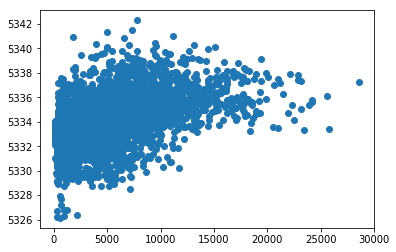

In [123]:
plt.scatter(y_test,pre)

In [124]:
from sklearn.cross_validation import cross_val_score
sco= cross_val_score(mme,X_test,y_test,cv =10)

In [125]:
print(sco.mean()*100)

-2.7509399222177366


In [126]:
from sklearn.metrics import r2_score

In [127]:
r2_score(y_test,pred)

0.5806903146418394

In [128]:
from sklearn.grid_search import GridSearchCV

In [129]:
param_grid = {'n_jobs':[0.1,0.2,0.3,0.4,0.6]}

In [130]:
mm = GridSearchCV(LinearRegression(),param_grid,verbose = 3)

In [131]:
mm.fit(X_train,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] n_jobs=0.1 ......................................................
[CV] ............................. n_jobs=0.1, score=0.537844 -   0.0s
[CV] n_jobs=0.1 ......................................................
[CV] ............................. n_jobs=0.1, score=0.523085 -   0.0s
[CV] n_jobs=0.1 ......................................................
[CV] ............................. n_jobs=0.1, score=0.507358 -   0.0s
[CV] n_jobs=0.2 ......................................................
[CV] ............................. n_jobs=0.2, score=0.537844 -   0.0s
[CV] n_jobs=0.2 ......................................................
[CV] ............................. n_jobs=0.2, score=0.523085 -   0.0s
[CV] n_jobs=0.2 ......................................................
[CV] ............................. n_jobs=0.2, score=0.507358 -   0.0s
[CV] n_jobs=0.3 ......................................................
[CV] ............

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_jobs': [0.1, 0.2, 0.3, 0.4, 0.6]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=3)

In [132]:
mm.best_estimator_

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=0.1, normalize=False)

In [133]:
grid = mm.predict(X_test)

In [134]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(mm,X_test,y_test,cv =10)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] n_jobs=0.1 ......................................................
[CV] ............................. n_jobs=0.1, score=0.575756 -   0.0s
[CV] n_jobs=0.1 ......................................................
[CV] ............................. n_jobs=0.1, score=0.558378 -   0.0s
[CV] n_jobs=0.1 ......................................................
[CV] ............................. n_jobs=0.1, score=0.613937 -   0.0s
[CV] n_jobs=0.2 ......................................................
[CV] ............................. n_jobs=0.2, score=0.575756 -   0.0s
[CV] n_jobs=0.2 ......................................................
[CV] ............................. n_jobs=0.2, score=0.558378 -   0.0s
[CV] n_jobs=0.2 ......................................................
[CV] ............................. n_jobs=0.2, score=0.613937 -   0.0s
[CV] n_jobs=0.3 ......................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ............................. n_jobs=0.3, score=0.575756 -   0.0s
[CV] n_jobs=0.3 ......................................................
[CV] ............................. n_jobs=0.3, score=0.558378 -   0.0s
[CV] n_jobs=0.3 ......................................................
[CV] ............................. n_jobs=0.3, score=0.613937 -   0.0s
[CV] n_jobs=0.4 ......................................................
[CV] ............................. n_jobs=0.4, score=0.575756 -   0.0s
[CV] n_jobs=0.4 ......................................................
[CV] ............................. n_jobs=0.4, score=0.558378 -   0.0s
[CV] n_jobs=0.4 ......................................................
[CV] ............................. n_jobs=0.4, score=0.613937 -   0.0s
[CV] n_jobs=0.6 ......................................................
[CV] ............................. n_jobs=0.6, score=0.575756 -   0.0s
[CV] n_jobs=0.6 ......................................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ............................. n_jobs=0.2, score=0.620688 -   0.0s
[CV] n_jobs=0.3 ......................................................
[CV] ............................. n_jobs=0.3, score=0.589346 -   0.0s
[CV] n_jobs=0.3 ......................................................
[CV] ............................. n_jobs=0.3, score=0.553162 -   0.0s
[CV] n_jobs=0.3 ......................................................
[CV] ............................. n_jobs=0.3, score=0.620688 -   0.0s
[CV] n_jobs=0.4 ......................................................
[CV] ............................. n_jobs=0.4, score=0.589346 -   0.0s
[CV] n_jobs=0.4 ......................................................
[CV] ............................. n_jobs=0.4, score=0.553162 -   0.0s
[CV] n_jobs=0.4 ......................................................
[CV] ............................. n_jobs=0.4, score=0.620688 -   0.0s
[CV] n_jobs=0.6 ......................................................


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ............................. n_jobs=0.6, score=0.589346 -   0.0s
[CV] n_jobs=0.6 ......................................................
[CV] ............................. n_jobs=0.6, score=0.553162 -   0.0s
[CV] n_jobs=0.6 ......................................................
[CV] ............................. n_jobs=0.6, score=0.620688 -   0.0s
Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] n_jobs=0.1 ......................................................
[CV] ............................. n_jobs=0.1, score=0.574474 -   0.0s
[CV] n_jobs=0.1 ......................................................
[CV] ............................. n_jobs=0.1, score=0.554717 -   0.0s
[CV] n_jobs=0.1 ......................................................
[CV] ............................. n_jobs=0.1, score=0.617499 -   0.0s
[CV] n_jobs=0.2 ......................................................
[CV] ............................. n_jobs=0.2, score=0.574474 -   0.0s
[CV] n_jobs=0.2 .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ............................. n_jobs=0.4, score=0.573610 -   0.0s
[CV] n_jobs=0.4 ......................................................
[CV] ............................. n_jobs=0.4, score=0.550211 -   0.0s
[CV] n_jobs=0.4 ......................................................
[CV] ............................. n_jobs=0.4, score=0.616577 -   0.0s
[CV] n_jobs=0.6 ......................................................
[CV] ............................. n_jobs=0.6, score=0.573610 -   0.0s
[CV] n_jobs=0.6 ......................................................
[CV] ............................. n_jobs=0.6, score=0.550211 -   0.0s
[CV] n_jobs=0.6 ......................................................
[CV] ............................. n_jobs=0.6, score=0.616577 -   0.0s
Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] n_jobs=0.1 ......................................................
[CV] ............................. n_jobs=0.1, score=0.571505 -   0.0s
[CV] n_jobs=0.1 .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished


[CV] ............................. n_jobs=0.2, score=0.619327 -   0.0s
[CV] n_jobs=0.3 ......................................................
[CV] ............................. n_jobs=0.3, score=0.571505 -   0.0s
[CV] n_jobs=0.3 ......................................................
[CV] ............................. n_jobs=0.3, score=0.574908 -   0.0s
[CV] n_jobs=0.3 ......................................................
[CV] ............................. n_jobs=0.3, score=0.619327 -   0.0s
[CV] n_jobs=0.4 ......................................................
[CV] ............................. n_jobs=0.4, score=0.571505 -   0.0s
[CV] n_jobs=0.4 ......................................................
[CV] ............................. n_jobs=0.4, score=0.574908 -   0.0s
[CV] n_jobs=0.4 ......................................................
[CV] ............................. n_jobs=0.4, score=0.619327 -   0.0s
[CV] n_jobs=0.6 ......................................................
[CV] .

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] n_jobs=0.1 ......................................................
[CV] ............................. n_jobs=0.1, score=0.572198 -   0.0s
[CV] n_jobs=0.1 ......................................................
[CV] ............................. n_jobs=0.1, score=0.567987 -   0.0s
[CV] n_jobs=0.1 ......................................................
[CV] ............................. n_jobs=0.1, score=0.584765 -   0.0s
[CV] n_jobs=0.2 ......................................................
[CV] ............................. n_jobs=0.2, score=0.572198 -   0.0s
[CV] n_jobs=0.2 ......................................................
[CV] ............................. n_jobs=0.2, score=0.567987 -   0.0s
[CV] n_jobs=0.2 ......................................................
[CV] ............................. n_jobs=0.2, score=0.584765 -   0.0s
[CV] n_jobs=0.3 ......................................................
[CV] ............

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ............................. n_jobs=0.6, score=0.567987 -   0.0s
[CV] n_jobs=0.6 ......................................................
[CV] ............................. n_jobs=0.6, score=0.584765 -   0.0s
Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] n_jobs=0.1 ......................................................
[CV] ............................. n_jobs=0.1, score=0.573377 -   0.0s
[CV] n_jobs=0.1 ......................................................
[CV] ............................. n_jobs=0.1, score=0.565879 -   0.0s
[CV] n_jobs=0.1 ......................................................
[CV] ............................. n_jobs=0.1, score=0.612823 -   0.0s
[CV] n_jobs=0.2 ......................................................
[CV] ............................. n_jobs=0.2, score=0.573377 -   0.0s
[CV] n_jobs=0.2 ......................................................
[CV] ............................. n_jobs=0.2, score=0.565879 -   0.0s
[CV] n_jobs=0.2 .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished


In [135]:
print(scores.mean()*100)

57.64633959272227


In [136]:
from sklearn import metrics

In [137]:
print(metrics.mean_squared_error(y_test,pred))

8572415.73425257


In [138]:
test = pd.read_csv('test_stop.xls')

In [139]:
test.drop('Unnamed: 0',axis =1,inplace = True)

In [140]:
pred2 = mod.predict(test)

In [141]:
pred2

array([2990.4311358 , 6753.74563896, 6898.08951256, ..., 9498.53952981,
       3485.40527005, 6916.36371726])

In [142]:
a = pd.DataFrame({'Product_Supermarket_Sales':pred2})

In [143]:
dat11  = pd.read_csv('submission_price.xls')

In [144]:
dat11.drop('Product_Supermarket_Sales',axis = 1 , inplace = True)

In [145]:
submitted1 = pd.concat([dat11,a],axis =1)

In [146]:
submitted1.to_csv('answer5.csv',index = False)

In [147]:
da = data

In [148]:
da.head()

,Product_Weight,Product_Shelf_Visibility,Product_Price,Supermarket_Opening_Year,Product_Supermarket_Sales,Low Fat,Normal Fat,Ultra Low fat,Cluster 1,Cluster 2,Cluster 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,11.6,0.068535,357.54,2005,709.08,1,0,0,0,0,1,1,0,0,0
1,11.6,0.040912,355.79,1994,6381.69,1,0,0,0,0,1,0,1,0,0
2,11.6,0.041178,350.79,2014,6381.69,1,0,0,0,1,0,0,1,0,0
3,11.6,0.041113,355.04,2016,2127.23,1,0,0,0,0,1,0,0,1,0
4,11.6,0.000000,354.79,2011,2481.77,0,0,1,0,1,0,0,1,0,0


In [149]:
data.columns

Index(['Product_Weight', 'Product_Shelf_Visibility', 'Product_Price',
       'Supermarket_Opening_Year', 'Product_Supermarket_Sales', 'Low Fat',
       'Normal Fat', 'Ultra Low fat', 'Cluster 1', 'Cluster 2', 'Cluster 3',
       'Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'],
      dtype='object')

In [150]:
dat = data

In [151]:
dat.drop(['Normal Fat', 'Ultra Low fat', 'Cluster 1', 'Cluster 2','Grocery Store', 'Supermarket Type2','Supermarket Type3'],axis =1,inplace = True)

In [152]:
dat.columns

Index(['Product_Weight', 'Product_Shelf_Visibility', 'Product_Price',
       'Supermarket_Opening_Year', 'Product_Supermarket_Sales', 'Low Fat',
       'Cluster 3', 'Supermarket Type1'],
      dtype='object')

In [153]:
from sklearn.cross_validation import train_test_split

In [154]:
X = dat[['Product_Weight', 'Product_Shelf_Visibility', 'Product_Price','Supermarket_Opening_Year', 'Low Fat','Cluster 3', 'Supermarket Type1']]
y = dat['Product_Supermarket_Sales']

In [155]:
from sklearn.linear_model import LinearRegression

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [157]:
model4 = LinearRegression()

In [158]:
model4.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [159]:
preeed = model4.predict(X_test)

In [160]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(model4,X_test,y_test,cv =10)

In [161]:
print(scores.mean()*100)

32.483489823130604


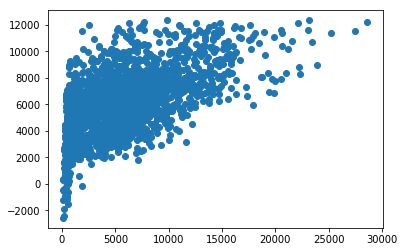

In [162]:
plt.scatter(y_test,preeed)